<a href="https://colab.research.google.com/github/BrianM50/MAT-422/blob/main/Section_3_5%2C_3_6_(K_means_and_Support_Vector_Machine).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn.metrics import accuracy_score

print('A popular method of vector quantization is k-means clustering it aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.')


A popular method of vector quantization is k-means clustering it aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.


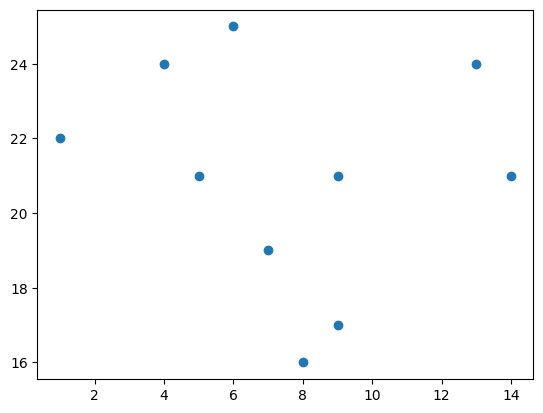

In [3]:
x = [9, 7, 4, 9, 8, 6, 13, 1, 5, 14]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

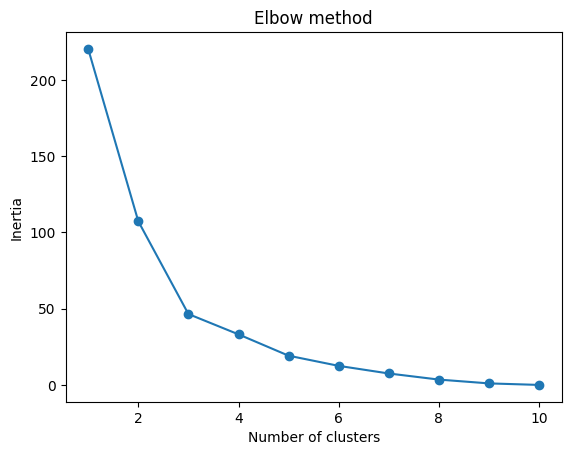

In [5]:
#Turns the data into a set of points
data = list(zip(x, y))
inertias = []

#Trains the K-means model
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

#Plots the intertia at that number of clusters
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


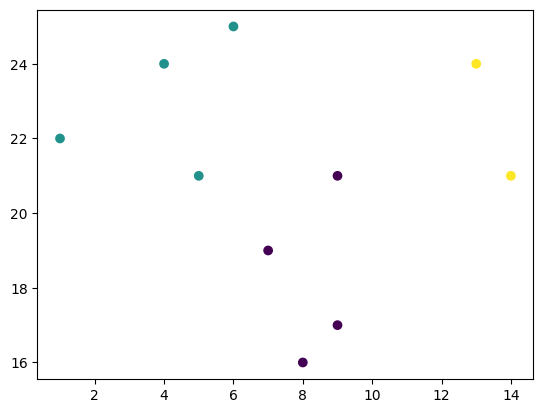

In [7]:
#The the graph becomes linear at K=3
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

#Plot the different clusters assigned to the data
plt.scatter(x, y, c=kmeans.labels_)
plt.show()

Support-vector machines are supervised learning models in machine learning, which aim to analyze data for classification and regression analysis


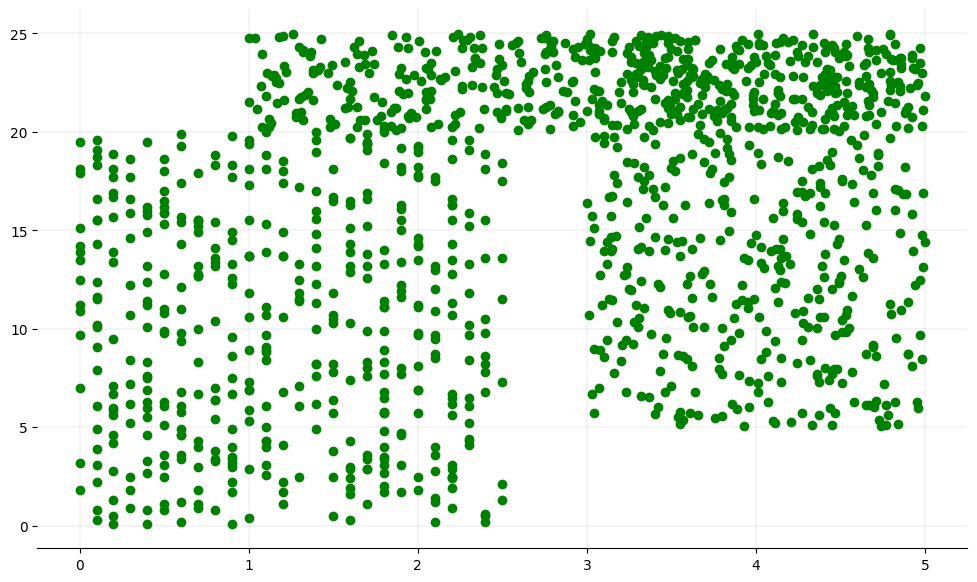

In [11]:
print('Support-vector machines are supervised learning models in machine learning, which aim to analyze data for classification and regression analysis')

#Creates function to generate random dataset of a quadratic distribution
def generate_random_dataset(size):
    x = []
    y = []
    target = []
    for i in range(size):
        x.append(np.round(random.uniform(0, 2.5), 1))
        y.append(np.round(random.uniform(0, 20), 1))
        target.append(0)
        x.append(np.round(random.uniform(1, 5), 2))
        y.append(np.round(random.uniform(20, 25), 2))
        target.append(1)
        x.append(np.round(random.uniform(3, 5), 2))
        y.append(np.round(random.uniform(5, 25), 2))
        target.append(1)
    df_x = pd.DataFrame(data=x)
    df_y = pd.DataFrame(data=y)
    df_target = pd.DataFrame(data=target)
    data_frame = pd.concat([df_x, df_y], ignore_index=True, axis=1)
    data_frame = pd.concat([data_frame, df_target], ignore_index=True, axis=1)
    data_frame.columns = ['x', 'y', 'target']
    return data_frame

#Generate dataset
size = 500
dataset = generate_random_dataset(size)
features = dataset[['x', 'y']]
label = dataset['target']

#Hold out 30% of the dataset for training
test_size = int(np.round(size * 0.3, 0))

# Split dataset into training and testing sets
x_train = features[:-test_size].values
y_train = label[:-test_size].values
x_test = features[-test_size:].values
y_test = label[-test_size:].values

#Plot the training set
fig, ax = plt.subplots(figsize=(12, 7))

#Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

#Add major gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.scatter(features[:-test_size]['x'], features[:-test_size]['y'], color="#008000")
plt.show()


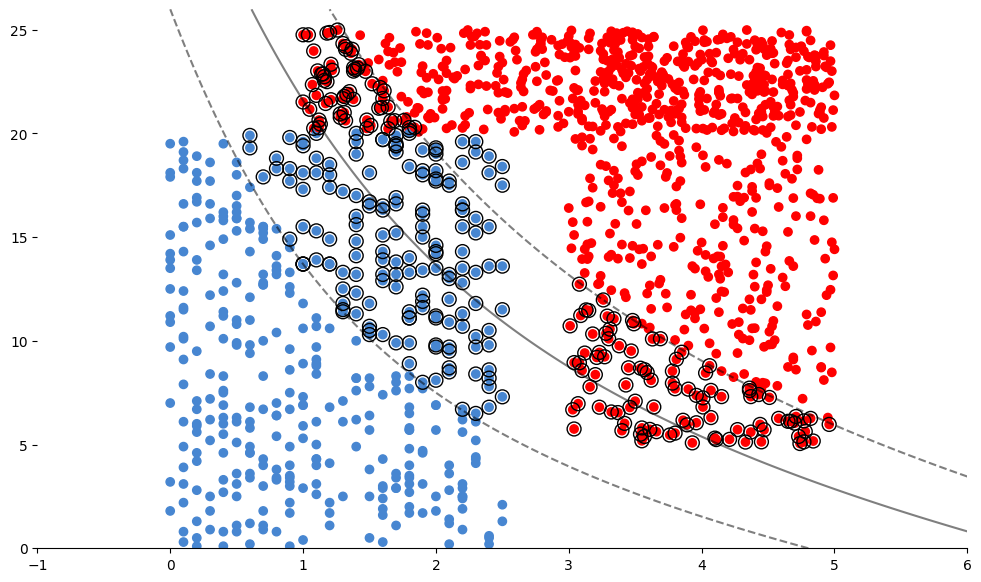

In [12]:
model = svm.SVC(kernel='poly', degree=2)
model.fit(x_train, y_train)

fig, ax = plt.subplots(figsize=(12, 7))

#Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

#Create grid to evaluate model
xx = np.linspace(-1, max(features['x']) + 1, len(x_train))
yy = np.linspace(0, max(features['y']) + 1, len(y_train))
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
train_size = len(features[:-test_size]['x'])

#Assign different colors to the classes
colors = y_train
colors = np.where(colors == 1, '#FF0000', '#4786D1')

#Plot the dataset
ax.scatter(features[:-test_size]['x'], features[:-test_size]['y'], c=colors)

#Get the separating hyperplane
Z = model.decision_function(xy).reshape(XX.shape)

#Draw the decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

#Highlight support vectors with a circle around them
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [13]:
#Test the accuracy of the model
prediction = model.predict(x_test)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy (normalized): " + str(accuracy))

Accuracy (normalized): 0.9266666666666666
